In [79]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, genpareto

In [80]:
real = torch.load('real.pt')

In [81]:
sums = torch.trapezoid(real, dx=1 / 4).cpu().numpy() / 10
print(sums)

[[2.2008014]
 [2.1872964]
 [2.186086 ]
 ...
 [0.       ]
 [0.       ]
 [0.       ]]


In [82]:
percentile = (100*(1-(0.75**10)))
print(percentile)
tail = np.where(sums > np.percentile(sums, percentile))[0][-1]
print(tail)

94.36864852905273
555


In [83]:
body_dist, tail_dist = sums[tail:], sums[:tail]

In [84]:
skewnorm_params = skewnorm.fit(sums)
genpareto_params = genpareto.fit(tail_dist - sums[tail])

In [85]:
body_rv = skewnorm(*skewnorm_params)
tail_rv = genpareto(*genpareto_params)

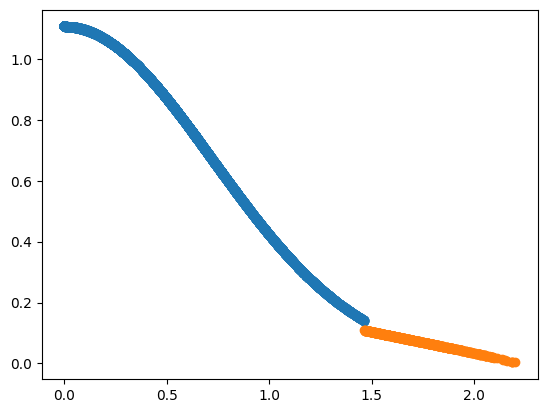

In [86]:
plt.scatter(body_dist, body_rv.pdf(body_dist))
plt.scatter(tail_dist, (1-body_rv.cdf(sums[tail]))*tail_rv.pdf(tail_dist - sums[tail]))

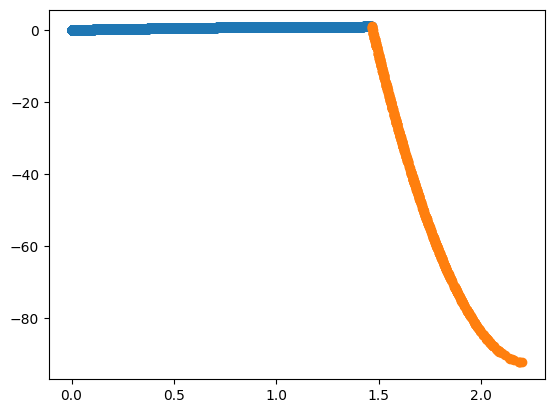

In [87]:
plt.scatter(body_dist, body_rv.cdf(body_dist))
plt.scatter(tail_dist, body_rv.cdf(body_dist[0])+(1-percentile)*tail_rv.cdf(tail_dist - sums[tail]))

In [88]:
sums[tail]

array([1.4649727], dtype=float32)

In [89]:
genpareto_params

(-0.5157816898334942, 9.916642924031737e-05, 0.38879824425992027)

In [90]:
skewnorm_params

(7098253.417896543, -4.953739652698757e-07, 0.7209872901464054)